In [1]:
# Set Dependencies
import pandas as pd

In [2]:
# Read in the csv
df1 = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [3]:
# Display the DataFrame
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
# Drop irrelevant columns from the data set
wine_df = df1[["country", "description", "designation", "points", "price", "province", "region_1", "title", "variety", "winery"]]
wine_df.head()

,country,description,designation,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
wine_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery'],
      dtype='object')

In [11]:
# Print the length of our wine dataframe
len(wine_df)

129971

In [18]:
# Parse the data to remove null items and NaN values
parsed_wine_df.dropna(subset=["description", "points"])
print("Length of wine dataframe after NaN are removed:", len(parsed_wine_df))

Length of wine dataframe after NaN are removed: 20026


In [23]:
# Get info on our parsed dataframe
parsed_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 9 to 129913
Data columns (total 10 columns):
country        20018 non-null object
description    20026 non-null object
designation    14162 non-null object
points         20026 non-null int64
price          18814 non-null float64
province       20018 non-null object
region_1       16648 non-null object
title          20026 non-null object
variety        20026 non-null object
winery         20026 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [27]:
# Describe our dataframe
parsed_wine_df.describe()

,points,price
count,20026.000000,18814.000000
mean,88.505693,32.322632
std,2.308123,24.573022
min,81.000000,5.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,97.000000,500.000000


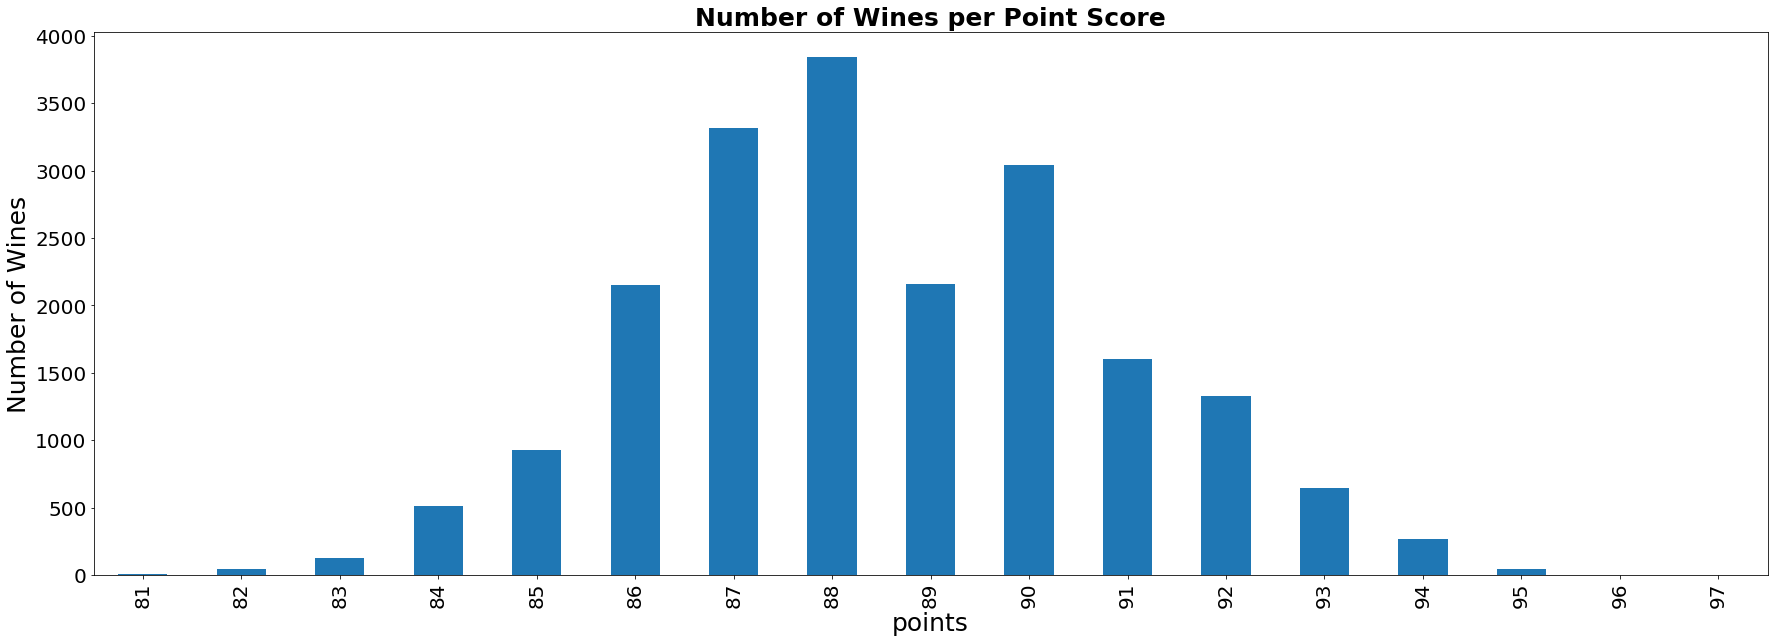

In [26]:
#Track the number of wines per point
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of Wines per Point Score', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of Wines', fontsize = 25) # Y label
ax.set_xlabel('Point Score', fontsize = 25) # X label
parsed_wine_df.groupby(['points']).count()['title'].plot(ax=ax, kind='bar')

In [30]:
# # Bin the wine dataframe using qcut
# 1 -> Points 80 to 84 (Subpar wines)

# 2 -> Points 84 to 88 (Average wines)

# 3 -> Points 88 to 92 (Good wines)

# 4 -> Points 92 to 96 (Excelent wines)

# 5 -> Points 96 to 100 (Premium wines)
quintile_df = pd.qcut(parsed_wine_df['points'], q=5)
quintile_df

9         (80.999, 87.0]
10        (80.999, 87.0]
11        (80.999, 87.0]
12        (80.999, 87.0]
13        (80.999, 87.0]
               ...      
129879      (89.0, 90.0]
129880      (89.0, 90.0]
129881      (89.0, 90.0]
129882      (89.0, 90.0]
129913      (90.0, 97.0]
Name: points, Length: 20026, dtype: category
Categories (5, interval[float64]): [(80.999, 87.0] < (87.0, 88.0] < (88.0, 89.0] < (89.0, 90.0] < (90.0, 97.0]]

In [19]:
# Import Multi-linear Regression Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Assign the data to X and y for just 'points'

X = parsed_wine_df[["price"]]
y = parsed_wine_df["points"].values.reshape(-1, 1)
print(X.shape, y.shape)

(20026, 1) (20026, 1)


In [21]:
# List out the DataFrames' features
from sklearn.datasets import make_regression

n_features = 9
n_samples = len(parsed_wine_df)
X, y = make_regression(n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(20026, 9)


In [22]:
# Calculate R Score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999937350204585
